In [38]:
!pip install -r requirements.txt

Using cached jupyter-1.1.1-py2.py3-none-any.whl (2.7 kB)
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
Using cached jupyter_console-6.6.3-py3-none-any.whl (24 kB)
Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.13-py3-none-any.whl (2.3 MB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Przydatne linki:

1.https://scikit-fingerprints.github.io/scikit-fingerprints/index.html <- dokumentacja biblioteki Scikit-Fingerprints,

2.https://www.rdkit.org/docs/ <- Dokumentacja biblioteki RDKit, która umożliwi wykonanie wizualizacji,

3.https://pubchem.ncbi.nlm.nih.gov/ <- PubChem, bodaj największe otwarte źródło informacji o cząsteczkach chemicznych,

Format SMILES

SMILES to format sposób zapisywania struktury cząsteczek chemicznych w postaci ciągu znaków ASCII, znajdujący zastosowanie w chemii obliczeniowej czy bioinformatyce.

W formacie SMILES pierwiastki są oznaczane [X], gdzie X to symbol pierwiastka z układu okresowego.

Wyjątkami od powyższego są symbole C i O, które domyślnie oznaczają metan i wodę.

Pierwiastki organiczne (https://pl.wikipedia.org/wiki/Pierwiastki_biofilne) można zapisać bez nawiasów kwadratowych.

Gdy między symbolami nie występują żadne znaki, to oznacza to, że są one połączone wiązanie pojedycznym. Wiązania podwójne i potrójne oznacza się kolejno symbolami = i #.

Rozgałęzienia struktur oznacza się przy pomocy nawiasów okrągłych.

Do zapisu układów cyklicznych używa się małych liter.

Zadanie 1

Zilustrujmy powyższe reguły zapisu w formacie SMILES przedstawiając związki chemiczne w postaci grafów. W tym celu będziemy potrzebować biblioteki RDKit, która zapewnie narzędzia potrzebne do wizualizacji. Potrzebne do zadania SMILESy możesz znaleźć na stronie https://pubchem.ncbi.nlm.nih.gov/

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw, Mol
from skfp.preprocessing.mol_to_from_smiles import MolFromSmiles

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for class boost::shared_ptr<class RDKit::FilterMatcherBase> already registered; second conversion method ignored.


In [3]:
# TODO: Znajdź w serwisie PubChem (lub dowolonym innym) SMILES podanych poniżej związków z różnymi rodzajami wiązań, rozgałęzieniami a także związków cyklicznych.
smiles_list: list[str] = ["C", # Metan (Methane)
                          "O=C=O", # TODO: Dwutlenek węgla (Carbon dioxide)
                          "C#C", # TODO: Acetylen (Acetylene)
                          "CC(=O)O", # TODO: Kwas octowy (Acetic acid)
                          "c1ccccc1"] # TODO: Benzen (Benzene)

In [4]:
# Mając gotowe SMILESy powinniśmy przekonwertować jest do molekuł, reprezentowanych przez obiekt Mol
mols_list: list[Mol] = []
for smiles in smiles_list:
    mols_list.append(MolFromSmiles(smiles)) # TODO

In [5]:
# Teraz możemy przyjrzeć się grafom reprezentującym poszczególne molekuły
for mol in mols_list:
    image = Draw.MolToImage(mol)
    image.show()

Jupyter pozwala bezpośrednio wyświetlać molekuły

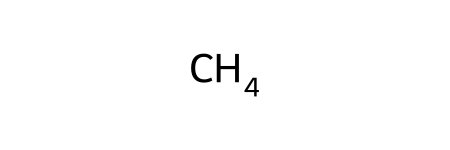

In [5]:
mols_list[0]

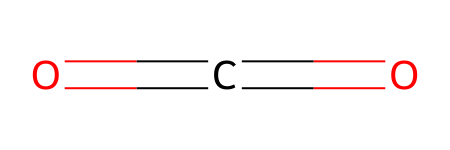

In [6]:
mols_list[1]

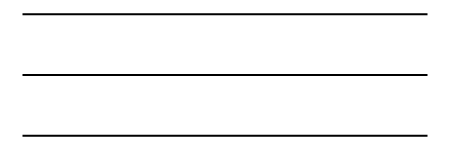

In [7]:
mols_list[2]

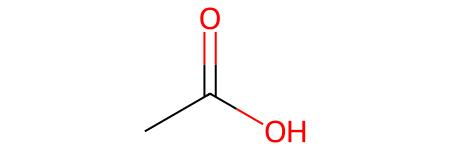

In [8]:
mols_list[3]

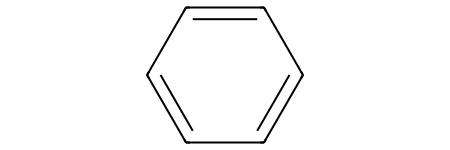

In [9]:
mols_list[4]

Zadanie 2

Teraz wyświetlmy poszczególne atomy, z których składają się związki powyżej.

In [13]:
def print_atom_info(mol):
    for atom in mol.GetAtoms():
        # TODO: Wyświetl symbole atomów wchodzących w skład podanej molekuły
        print(atom.GetSymbol())

In [14]:
for mol in mols_list:
    print_atom_info(mol)

C
O
C
O
C
C
C
C
O
O
C
C
C
C
C
C


Zadanie 3

Wyświetlmy rodzaje wiązań, które występują między atomami w związkach powyżej.

In [15]:
def print_bond_info(mol):
    for bond in mol.GetBonds():
        # TODO: Wyświetl symbole atomów wchodzących w skład podanej molekuł
        begin_atom = bond.GetBeginAtom()
        end_atom = bond.GetEndAtom()
        print(
            begin_atom.GetSymbol(),
            end_atom.GetSymbol(),
            f"{bond.GetBondType()}",
        )

In [16]:
for mol in mols_list:
    print_bond_info(mol)

O C DOUBLE
C O DOUBLE
C C TRIPLE
C C SINGLE
C O DOUBLE
C O SINGLE
C C AROMATIC
C C AROMATIC
C C AROMATIC
C C AROMATIC
C C AROMATIC
C C AROMATIC


Zadanie 4

Wyświetlmy informacje o ilości pierścieni w cząsteczce benzenu.

In [17]:
def get_ring_count(mol) -> int:
    # TODO: Pobierz i zwróc informację o pierścieniach w cząsteczce
    ring_info = mol.GetRingInfo()
    
    return ring_info.NumRings()

In [20]:
benzene_smiles = "c1ccccc1" # TODO
benzene_smiles = MolFromSmiles(benzene_smiles)

benzene_ring_count = get_ring_count(benzene_smiles)
print(benzene_ring_count)

1


In [21]:
assert benzene_ring_count == 1

W ten sposób możemy pozyskać proste deskryptory. Istnieje jednak o wiele więcej czynników, które przesądzają o właściwościach cząsteczki.

Deskryptory molekularne są kluczowe dla chemoinformatyki, za ich pomocą możemy na przykład filtrować zbiory danych w poszukiwaniu cząsteczek o interesujących właściwościach.

W celu obliczenia wartości interesujących nas deskryptorów moglibyśmy ręcznie wykonywać operacje na obiektach reprezentujących cząsteczki. Na szczęście mamy warstwę abstrakcji, która ułatwi nam zadanie: 

https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html

In [22]:
from rdkit.Chem import Crippen, rdMolDescriptors

Zadanie 5

Spróbujmy utworzyć trzy filtry molekularne, znane jako **GSK**, **Rule of Veber** i **Oprea**.

https://pubs.acs.org/doi/10.1021/jm701122q

https://pubmed.ncbi.nlm.nih.gov/12036371/

https://pubmed.ncbi.nlm.nih.gov/10756480/

Filtr GSK wymaga zdefiniowania dwóch deskryptorów:
- Masy molowej cząsteczki, https://pl.wikipedia.org/wiki/Masa_molowa
- logP https://pl.wikipedia.org/wiki/Wsp%C3%B3%C5%82czynnik_podzia%C5%82u, https://www.rdkit.org/docs/source/rdkit.Chem.Crippen.html

Rule of Veber też używa dwóch reguł:
- Ilości wiązań rotacyjnych (rotatble bonds),
- Topological polar surface area (TPSA) https://en.wikipedia.org/wiki/Polar_surface_area,

Rule of Oprea wymaga czterech deskryptorów:
- Ilości dawców wiązań wodorowych (HBD), 
- Ilości akceptorów wiązań wodorowych (HBA), 
https://www.researchgate.net/figure/Hydrogen-bond-donor-HBD-and-hydrogen-bond-acceptor-HBA-sites-for-trizaole-Tz-left_fig5_346474495
- Ilości wiązań rotacyjnych,
- Ilości pierścieni

W razie problemów można zajrzeć do repozytorium biblioteki **scikit-fingerprints**, która implementuje te i wiele innych filtrów.

https://github.com/scikit-fingerprints/scikit-fingerprints/tree/master

W ramach zadania przygotujemy znaczenie uproszczoną implementację, która pozwoli przedstawić regułę działania filtrów.

In [24]:
def would_pass_gsk_filter(mol) -> bool:
    # TODO
    rules = [
        rdMolDescriptors.CalcExactMolWt(mol) <= 400, # Masa molowa TODO
        Crippen.MolLogP(mol) <= 4, # logP TODO
    ]

    if not all(rules):
        return False
    else:
        return True

def would_pass_veber_rule(mol) -> bool:
    # TODO
    rules: list[bool] = [
        rdMolDescriptors.CalcNumRotatableBonds(mol) <= 10, # Ilość wiązań rotacyjnych TODO
        rdMolDescriptors.CalcTPSA(mol) <= 140 # TPSA TODO
    ]

    if not all(rules):
        return False
    else:
        return True


def would_pass_oprea_filter(mol) -> bool:
    # TODO
    rules: list[bool] = [
        0 <= rdMolDescriptors.CalcNumHBD(mol) <= 2, # HBD TODO
        2 <= rdMolDescriptors.CalcNumHBA(mol) <= 9, # HBA TODO
        2 <= rdMolDescriptors.CalcNumRotatableBonds(mol) <= 8, # Ilość wiązań rotacyjnych TODO
        1 <= rdMolDescriptors.CalcNumRings(mol) <= 4, # Ilość pierścieni TODO
    ]

    if not all(rules):
        return False
    else:
        return True

In [25]:
gsk_results: list[bool] = []
smiles_for_gsk: list[str] = [
    "C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O",  # Ciprofloxacin
        "CC(=O)CC(C1=CC=CC=C1)C2=C(C3=CC=CC=C3OC2=O)O",  # Warfarin
    r"CN1C(=NC(=O)C(=O)N1)SCC2=C(N3[C@@H]([C@@H](C3=O)NC(=O)/C(=N\OC)/C4=CSC(=N4)N)SC2)C(=O)O",  # Ceftriaxone
]

for smiles in smiles_for_gsk:
    # TODO przekonwertuj SMILEsy do Moli, wywołaj odpowiednią metodę i dodaj wynik do list
    mol_for_gsk = MolFromSmiles(smiles) # TODO
    gsk_results.append(would_pass_veber_rule(mol_for_gsk)) # TODO

In [26]:
veber_results: list[bool] = []
smiles_for_veber: list[str] = [
    "[C-]#N",
    "CC=O",
    "CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3NC4=CC(=C(C=C4)OCC5=CC(=CC=C5)F)Cl"
]

for smiles in smiles_for_veber:
    # TODO przekonwertuj SMILEsy do Moli, wywołaj odpowiednią metodę i dodaj wynik do list
    mol_for_veber = MolFromSmiles(smiles) # TODO
    veber_results.append(would_pass_veber_rule(mol_for_veber)) # TODO

In [27]:
oprea_results: list[bool] = []
smiles_for_oprea: list[str] = [
    "C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O",  # Ciprofloxacin
    "CC(=O)CC(C1=CC=CC=C1)C2=C(C3=CC=CC=C3OC2=O)O",  # Warfarin
    "CC(=O)Nc1ccc(O)cc1",  # Paracetamol
]

for smiles in smiles_for_veber:
    # TODO przekonwertuj SMILEsy do Moli, wywołaj odpowiednią metodę i dodaj wynik do list
    smiles_for_oprea = MolFromSmiles(smiles) # TODO
    oprea_results.append(would_pass_veber_rule(smiles_for_oprea)) # TODO

In [28]:
assert gsk_results == [True, True, False]
assert veber_results == [True, True, False]
assert oprea_results == [True, True, False]

Zadanie 6

Zmodyfikujmy wcześniej napisane metody, aby sprawdzić, które z reguł zostały złamane. Wyświetl wartości poszczególnych dekryptorów.

In [31]:
def gsk_issues(mol) -> None:
    # TODO skopiuj reguły z poprzedniego zadania
    rules = [
        rdMolDescriptors.CalcExactMolWt(mol) <= 400, # Masa molowa TODO
        Crippen.MolLogP(mol) <= 4, # logP TODO
    ]

    print(rules) # TODO

    # TODO:
    rule_values = [ 
        rdMolDescriptors.CalcExactMolWt(mol),
        Crippen.MolLogP(mol)
    ]

    print(rule_values) # TODO

def veber_issues(mol) -> None:
    # TODO skopiuj reguły z poprzedniego zadania
    rules: list[bool] = [
        rdMolDescriptors.CalcNumRotatableBonds(mol) <= 10, # Ilość wiązań rotacyjnych TODO
        rdMolDescriptors.CalcTPSA(mol) <= 140 # TPSA TODO
    ]

    print(rules) # TODO

    # TODO:
    rule_values = [ 
        rdMolDescriptors.CalcNumRotatableBonds(mol),
        rdMolDescriptors.CalcTPSA(mol)
    ]

    print(rule_values) # TODO

def oprea_issues(mol) -> None:
    # TODO skopiuj reguły z poprzedniego zadania
    rules: list[bool] = [
        0 <= rdMolDescriptors.CalcNumHBD(mol) <= 2, # HBD TODO
        2 <= rdMolDescriptors.CalcNumHBA(mol) <= 9, # HBA TODO
        2 <= rdMolDescriptors.CalcNumRotatableBonds(mol) <= 8, # Ilość wiązań rotacyjnych TODO
        1 <= rdMolDescriptors.CalcNumRings(mol) <= 4, # Ilość pierścieni TODO
    ]

    print(rules) # TODO

    rule_values = [ 
        rdMolDescriptors.CalcNumHBD(mol),
        rdMolDescriptors.CalcNumHBA(mol),
        rdMolDescriptors.CalcNumRotatableBonds(mol),
        rdMolDescriptors.CalcNumRotatableBonds(mol),
        rdMolDescriptors.CalcNumRings(mol)
    ]

    print(rule_values) # TODO

In [33]:
smiles_to_examine_gsk: list[str] = [
    r"CN1C(=NC(=O)C(=O)N1)SCC2=C(N3[C@@H]([C@@H](C3=O)NC(=O)/C(=N\OC)/C4=CSC(=N4)N)SC2)C(=O)O",  # TODO: Dodaj do listy SMILES, który nie przeszedł przez filtr w poprzednim zadaniu
]

for smiles in smiles_to_examine_gsk:
    # TODO przekonwertuj SMILEsy do Moli, wywołaj odpowiednią metodę i dodaj wynik do list
    mol_for_gsk = MolFromSmiles(smiles) # TODO
    gsk_issues(mol_for_gsk)

[False, True]
[554.0460579160002, -1.6112999999999957]


In [34]:
smiles_to_examine_veber: list[str] = [
    "CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3NC4=CC(=C(C=C4)OCC5=CC(=CC=C5)F)Cl",  # TODO: Dodaj do listy SMILES, który nie przeszedł przez filtr w poprzednim zadaniu
]

for smiles in smiles_to_examine_veber:
    # TODO przekonwertuj SMILEsy do Moli, wywołaj odpowiednią metodę i dodaj wynik do list
    mol_for_veber = MolFromSmiles(smiles) # TODO
    veber_issues(mol_for_veber)

[False, True]
[11, 106.35000000000001]


In [36]:
smiles_to_examine_oprea: list[str] = [
    "CC(=O)Nc1ccc(O)cc1",  # TODO: Dodaj do listy SMILES, który nie przeszedł przez filtr w poprzednim zadaniu
]

for smiles in smiles_to_examine_oprea:
    # TODO przekonwertuj SMILEsy do Moli, wywołaj odpowiednią metodę i dodaj wynik do list
    mol_for_oprea = MolFromSmiles(smiles) # TODO
    oprea_issues(mol_for_oprea)

[True, True, False, True]
[2, 2, 1, 1, 1]


TODO:

Które reguły zostały złamane w poszczególnych przypadkach?

Rzeczywiste implementacje często pozwalają na naruszenie jednej z reguł zawartych w filtrze. Spójrzmy na wyniki filtrowania przy pomocy scikit-fingerprints.